# **Projeto de Bioinformática e Análise de Dados - Descoberta Computacional de Fármacos**

## **Comparando Regressores**

Na Parte 5, compararemos vários algoritmos de ML para construir modelos de regressão de inibidores de acetilcolinesterase.



## **Importando as bibliotecas**

In [1]:
! pip install lazypredict

  Using cached click-8.1.7-py3-none-any.whl.metadata (3.0 kB)
     ---------------------------------------- 0.0/57.7 kB ? eta -:--:--
     ------- -------------------------------- 10.2/57.7 kB ? eta -:--:--
     -------------------------------------- 57.7/57.7 kB 765.1 kB/s eta 0:00:00
Using cached click-8.1.7-py3-none-any.whl (97 kB)
   ---------------------------------------- 0.0/1.4 MB ? eta -:--:--
   - -------------------------------------- 0.1/1.4 MB 3.4 MB/s eta 0:00:01
   ------- -------------------------------- 0.3/1.4 MB 3.2 MB/s eta 0:00:01
   ------------ --------------------------- 0.5/1.4 MB 3.5 MB/s eta 0:00:01
   ----------------- ---------------------- 0.6/1.4 MB 3.6 MB/s eta 0:00:01
   ---------------------- ----------------- 0.8/1.4 MB 3.6 MB/s eta 0:00:01
   -------------------------- ------------- 0.9/1.4 MB 3.7 MB/s eta 0:00:01
   -------------------------------- ------- 1.2/1.4 MB 3.9 MB/s eta 0:00:01
   -------------------------------------- - 1.4/1.4 MB 4.0 MB/


[notice] A new release of pip is available: 24.0 -> 24.3.1
[notice] To update, run: C:\Users\danii\AppData\Local\Microsoft\WindowsApps\PythonSoftwareFoundation.Python.3.11_qbz5n2kfra8p0\python.exe -m pip install --upgrade pip


In [2]:
import pandas as pd
import seaborn as sns
from sklearn.model_selection import train_test_split
import lazypredict
from lazypredict.Supervised import LazyRegressor

C:\Users\danii\AppData\Local\Temp\ipykernel_21348\3452414230.py:1: DeprecationWarning: 
Pyarrow will become a required dependency of pandas in the next major release of pandas (pandas 3.0),
(to allow more performant data types, such as the Arrow string type, and better interoperability with other libraries)
but was not found to be installed on your system.
If this would cause problems for you,
please provide us feedback at https://github.com/pandas-dev/pandas/issues/54466
        
  import pandas as pd


## **2. Carregue o conjunto de dados**

In [3]:
! wget https://github.com/dataprofessor/data/raw/master/acetylcholinesterase_06_bioactivity_data_3class_pIC50_pubchem_fp.csv

'wget' n�o � reconhecido como um comando interno
ou externo, um programa oper�vel ou um arquivo em lotes.


In [4]:
df = pd.read_csv('acetylcholinesterase_06_bioactivity_data_3class_pIC50_pubchem_fp.csv')

In [5]:
X = df.drop('pIC50', axis=1)
Y = df.pIC50

## **3. Pré-processamento de dados**

In [6]:
# Examine X dimension
X.shape

(4695, 881)

In [7]:
# Remove low variance features
from sklearn.feature_selection import VarianceThreshold
selection = VarianceThreshold(threshold=(.8 * (1 - .8)))
X = selection.fit_transform(X)
X.shape

(4695, 137)

In [8]:
# Perform data splitting using 80/20 ratio
X_train, X_test, Y_train, Y_test = train_test_split(X, Y, test_size=0.2, random_state=42)

## **4. Compare algoritmos de ML**

In [9]:
# Defines and builds the lazyclassifier
clf = LazyRegressor(verbose=0,ignore_warnings=True, custom_metric=None)
models_train,predictions_train = clf.fit(X_train, X_train, Y_train, Y_train)
models_test,predictions_test = clf.fit(X_train, X_test, Y_train, Y_test)

100%|██████████| 42/42 [00:58<00:00,  1.06it/s]

[LightGBM] [Info] Auto-choosing row-wise multi-threading, the overhead of testing was 0.001560 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Info] Total Bins 411
[LightGBM] [Info] Number of data points in the train set: 3756, number of used features: 137
[LightGBM] [Info] Start training from score 5.814494


100%|██████████| 42/42 [00:58<00:00,  1.40s/it]


'tuple' object has no attribute '__name__'
Invalid Regressor(s)


 98%|█████████▊| 41/42 [00:59<00:00,  1.03it/s]

[LightGBM] [Info] Auto-choosing row-wise multi-threading, the overhead of testing was 0.001316 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Info] Total Bins 411
[LightGBM] [Info] Number of data points in the train set: 3756, number of used features: 137
[LightGBM] [Info] Start training from score 5.814494


100%|██████████| 42/42 [01:00<00:00,  1.43s/it]


In [10]:
# Performance table of the training set (80% subset)
predictions_train

,Adjusted R-Squared,R-Squared,RMSE,Time Taken
Model,,,,
GaussianProcessRegressor,0.87,0.87,0.56,4.39
DecisionTreeRegressor,0.87,0.87,0.56,0.18
ExtraTreeRegressor,0.87,0.87,0.56,0.23
ExtraTreesRegressor,0.87,0.87,0.56,14.19
RandomForestRegressor,0.83,0.84,0.63,10.69
XGBRegressor,0.83,0.84,0.63,1.17
BaggingRegressor,0.81,0.82,0.66,1.34
MLPRegressor,0.78,0.78,0.72,6.04
HistGradientBoostingRegressor,0.68,0.70,0.86,1.32


In [11]:
# Performance table of the test set (20% subset)
predictions_test

,Adjusted R-Squared,R-Squared,RMSE,Time Taken
Model,,,,
HistGradientBoostingRegressor,0.45,0.53,1.07,1.24
RandomForestRegressor,0.43,0.51,1.09,12.54
LGBMRegressor,0.42,0.50,1.09,0.30
XGBRegressor,0.40,0.49,1.11,0.29
SVR,0.39,0.48,1.12,2.01
NuSVR,0.38,0.47,1.13,1.74
KNeighborsRegressor,0.36,0.45,1.15,0.04
MLPRegressor,0.35,0.45,1.16,8.27
BaggingRegressor,0.35,0.45,1.16,1.45


## **5. Visualização de dados do desempenho do modelo**

[(0.0, 1.0)]

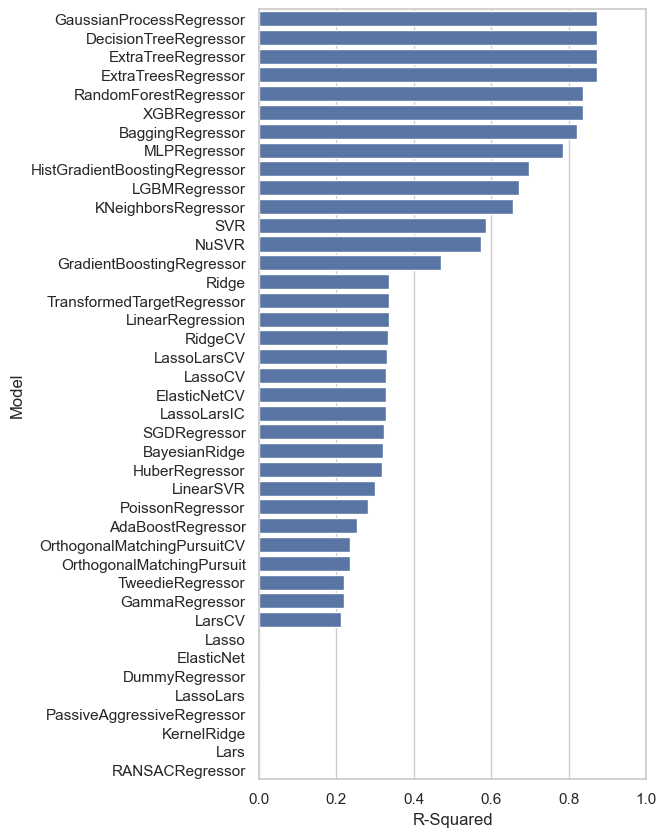

In [12]:
# Bar plot of R-squared values
import matplotlib.pyplot as plt
import seaborn as sns

#train["R-Squared"] = [0 if i < 0 else i for i in train.iloc[:,0] ]

plt.figure(figsize=(5, 10))
sns.set_theme(style="whitegrid")
ax = sns.barplot(y=predictions_train.index, x="R-Squared", data=predictions_train)
ax.set(xlim=(0, 1))

[(0.0, 10.0)]

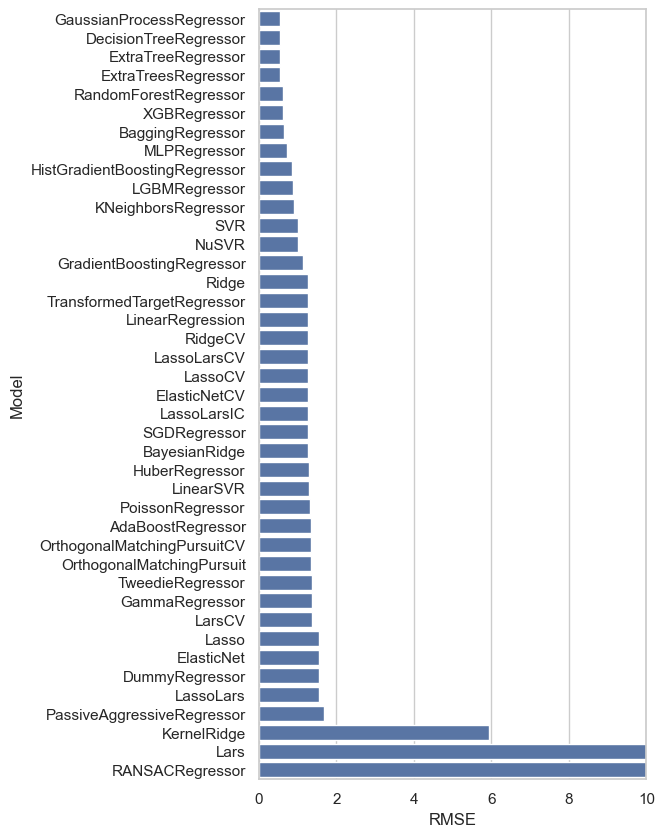

In [13]:
# Bar plot of RMSE values
import matplotlib.pyplot as plt
import seaborn as sns

plt.figure(figsize=(5, 10))
sns.set_theme(style="whitegrid")
ax = sns.barplot(y=predictions_train.index, x="RMSE", data=predictions_train)
ax.set(xlim=(0, 10))

[(0.0, 10.0)]

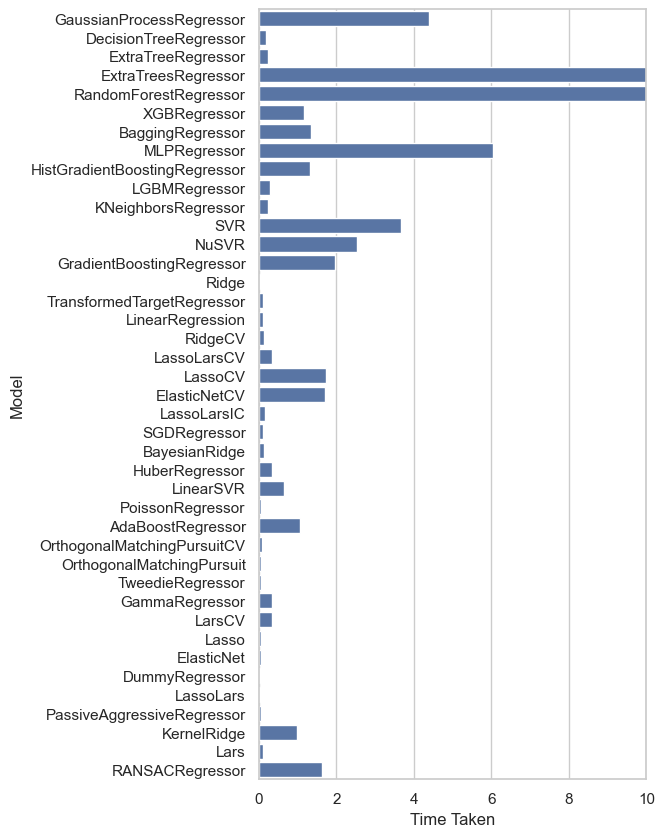

In [14]:
# Bar plot of calculation time
import matplotlib.pyplot as plt
import seaborn as sns

plt.figure(figsize=(5, 10))
sns.set_theme(style="whitegrid")
ax = sns.barplot(y=predictions_train.index, x="Time Taken", data=predictions_train)
ax.set(xlim=(0, 10))